- La présentation et les commentaires compteront pour une partie importante de la note.
- Nous nous attendons à ce que vous soyez capables d'étudier des données en utilisant les méthodes vues en TP.  
- Vous avez droit à toutes les ressources sur cette plateforme ou en ligne.   
- Pensez à bien enregistrer puis __télécharger__ très régulièrement votre notebook, au cas où la plateforme vous déconnecte.

## Enoncé

### Partie 1: _(15 points)_

L'ensemble de données contient des mesures sur la composition de 10 marques de pizza. Les variables de l'ensemble de données sont:

* brand - Marque de pizza 
* id - Échantillon analysé
* mois - Quantité d'eau pour 100 grammes dans l'échantillon
* prot - Quantité de protéines pour 100 grammes dans l'échantillon
* fat - Quantité de matières grasses pour 100 grammes dans l'échantillon
* ash - Quantité de cendres pour 100 grammes dans l'échantillon
* sodium - Quantité de sodium pour 100 grammes dans l'échantillon
* carb - Quantité de glucides pour 100 grammes dans l'échantillon
* cal - Quantité de calories pour 100 grammes dans l'échantillon


__1. Extraire les colonnes correspondant aux mesures ainsi que la variable catégorielle.__

__2. Effectuer une ACP de ces données. Que suggèrent les metriques par rappport au nombre de composantes à retenir ?__

__3. En premier lieu, on prendra les deux premières composantes principales et on soignera les représentations graphiques. Le modèle est t-il représentatif?__

__4. Effectuer une CAH pour afficher le dendogramme.__

__5. Comparer avec une méthode K-means.__

__6. Peut-on dire que la classification est bonne comparée au numéro de marque de pizza donné? (En d'autres termes, vérifier si les pizza appartenant à la même marque sont regroupées dans une même classe).__

__7. Est-il judicieux d'exclure un groupe et de refaire une ACP? Justifier et l'effectuer si besoin.__

_Remarque: pour la classification, nous ne cherchons pas à retrouver autant de classes que le nombre de marques de pizza donné._

### Partie 2: _(5 points)_

Cet ensemble de données provient de l'Institut national du diabète et des maladies digestives et rénales indiens. L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient est prédisposé au diabète ou non, sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. Plusieurs contraintes ont été imposées à la sélection de ces cas à partir d'une base de données plus importante. En particulier, tous les patients ici sont des femmes d'au moins 21 ans d'origine indienne.

L'ensemble de données se composent de plusieurs variables prédictives médicales et d'une variable cible, le résultat. L'ensemble des variables est décrit comme suit:

* NBG - Nombre de grossesses

* GC - Concentration de glucose plasmatique 

* TD - Tension artérielle diastolique

* EPC - Épaisseur de pli cutané tricipitale

* IS - Insuline sérique  
 
* IMC - Indice de masse corporelle

* DG - La fonction de l'arbre généalogique du diabète (une fonction qui évalue la probabilité de diabète sur la base des antécédents familiaux)

* AGE - L'age

* RESULTAT - La variable de classe (1 si l'individu est prédisposé au diabète, 0 sinon)


__1. Créer un réseau de neurones permettant de prédire si une patiente est prédisposée au diabète ou non. En premier lieu suggérer le votre, puis utiliser le modèle proposé et comparer.__

__2. Evaluer votre modèle ainsi que modèle proposé sur les données test. Commenter.__


__Indication:__

_Commencer par extraire un jeu de test au préalable représentant 20% de la taille de la base de données:_

 x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


# Partie 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from pandas.plotting import scatter_matrix

In [2]:
data1 = pd.read_csv('Pizza.csv')
data1.head(2)

brand     id   mois   prot    fat   ash  sodium  carb   cal
0     A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1     A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84

__1. Extraire les colonnes correspondant aux mesures ainsi que la variable catégorielle.__

In [3]:
#Récupération des données
data = data1.iloc[:,2::]
var_c = data1.iloc[:,0]
print('Entête du tableau de données \n',data.head(5))
print('\n Entête du tableau variable catégorielle : \n',var_c.head(5))

data = data.values
var_c = var_c.values

Entête du tableau de données 
     mois   prot    fat   ash  sodium  carb   cal
0  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2  28.35  19.99  45.78  5.08    1.63  0.80  4.95
3  30.55  20.15  43.13  4.79    1.61  1.38  4.74
4  30.49  21.28  41.65  4.82    1.64  1.76  4.67

 Entête du tableau variable catégorielle : 
 0    A
1    A
2    A
3    A
4    A
Name: brand, dtype: object


__2. Effectuer une ACP de ces données. Que suggèrent les metriques par rappport au nombre de composantes à retenir ?__

#### Réalisation de l'ACP

In [4]:
#On centre et on réduit les données
sc = StandardScaler()
Z = sc.fit_transform(data)

#On effectue l'ACP et on récupère les coordonées sans préciser le nombre de composantes : il est maximal par défaut
acp = sklearnPCA(svd_solver="full")
coord = acp.fit_transform(Z)

#Récupération du tableau coordonnées et visualisation des résultats sur les deux premières composantes principales
principalComponents = coord[:,0:2]
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2)

Axe principal 1  Axe principal 2
0         5.010343         2.679215
1         5.023755         2.529295

#### Affichage

In [5]:
# Constitution de la matrice finale avec la variable qualitative brand

finaldf = pd.concat([principaldf, data1[['brand']]], axis = 1)
finaldf.head(2)

Axe principal 1  Axe principal 2 brand
0         5.010343         2.679215     A
1         5.023755         2.529295     A

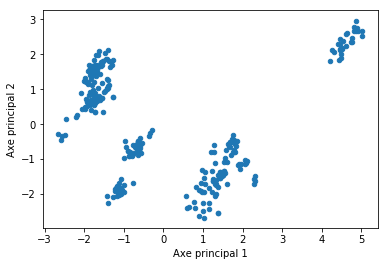

In [6]:
# Première représentation graphique sans distinction des variables qualitatives
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

On peut ici commencer à faire une première interprétation. On remarque quatre groupes d'individus distincts : on peut potentiellement dire que l'ACP effectuée et projetée sur les axes principaux 1 et 2 est relativelent bonne et peut démontrer des différences comportementales dans l'échantillon étudié. Par ailleurs, on peut remarquer qu'il y a un groupe légèrement isolé des autres : une première interprétation de l'ACP contenant ce groupe peut s'avérer utile mais il ne faut pas négliger la réalisation d'une nouvelle ACP en excluant ce groupe. Cela nous permettrais de mieux distinguer les différences qu'il existe entre les autres groupes.
Il est toutefois important ici de souligner que nous avons fait une représentation sur les deux premières composantes dans le but de se construitre un premier avis sur les données : nous n'avons ici pas tenu compte de la quantité d'information conservée (inertie expliquée) par la projection dans le groupe retenu. 

#### Analyse des métriques

In [7]:
#RÉCUPÉRATION DES DONNÉES

#Nombre de composantes calculées (normalement égal au nombre de variables retenues)
n = (acp.n_components_)
print('\n Le nombre de composantes calculées : n = ',n)

# Valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(Z)-1)/len(Z) #ajustement suite à la version 0.2
print('\n Les valeurs propres associées à chaque composante principale sont les suivantes : \n',eigval)

#Ratio de réprésentation des valeurs propres = Variance expliquée
print('\n La variance expliquée associée à chaque valeur propre : \n',[ratio for ratio in acp.explained_variance_ratio_])


 Le nombre de composantes calculées : n =  7

 Les valeurs propres associées à chaque composante principale sont les suivantes : 
 [4.17178190e+00 2.29045739e+00 4.14562342e-01 9.51742273e-02
 2.76770181e-02 3.37609355e-04 9.51878034e-06]

 La variance expliquée associée à chaque valeur propre : 
 [0.5959688423344786, 0.32720819826580877, 0.05922319175390227, 0.013596318186805336, 0.003953859725404389, 4.8229907838475444e-05, 1.3598257621454694e-06]


À la vue des valeurs des différents paramètres ci-dessus, on peui faire un premier choix du nombre de composantes principales à retenir.
Seules les deux premières composantes principales sont supérieures à 1 : en se fiant au critère de Kaiser on peut restreindre notre analyse à l'étude des résultats de l'ACP sur ces deux premières composantes principales (qui restituent tout de même environ 93% de l'information disponible).

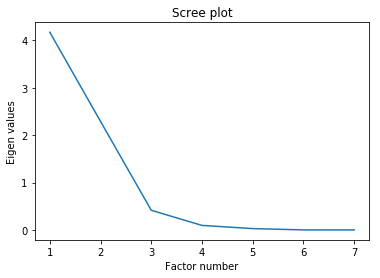

In [8]:
#Affichage du Scree Plot 

plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

On obtient donc ci-dessus un graphique reprenant la valeur propre associée à chaque composante principale. 
On retrouve bien ici le même nombre de composantes principales à retenir si l'on utilise le critère de Kaiser (normal car valeurs propores inchangées)
En revanche si on analyse ce graphique avec le critère du coude de Cattell, le nombre judicieux de composantes à retenir serait trois (bien que la valeur propre associée à la troisième composante principale soit inférieure à trois).
Les critères de Kaiser et du coude de Cattell donnent donc des résultats différents : on peut se permettre de rretenir uniquement les deux premières composants principales pour mener notre analyse mais une étude sur la troisième composante principale peut s'avérer utile et peut permettre de nuancer nos propos.

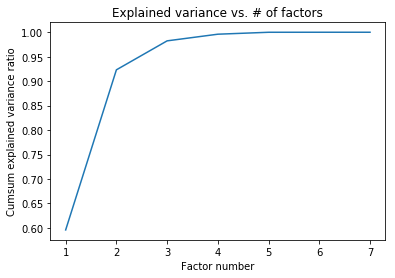

In [9]:
#Affichage de la variance expliquée cumulée

plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

On retrouve ici, par application du critère du coude de Catell un nombre de trois composantes principales à retenir. On note une fois de plus que l'information restituée par les deux premières composantes est estimée à 93% ce qui est suffisant pour permettre une bonne interprétation. On retrouve en revanche que l'information conservée par les trois premiers axes est de 97% : une différence de 5% par rapport au cas précédent qui peut nous permettre de mieux interpréter les données.

__3. En premier lieu, on prendra les deux premières composantes principales et on soignera les représentations graphiques. Le modèle est t-il représentatif?__

On retient donc deux composantes principales. Ayant préalablement tracé un rapide graphique de l'ACP sur ces deux première composantes nous allons ici tracer une représentation de l'ACP plus complète. Pour ce faire nous faisons ressortir des information suppplémentaire : on se propose de colorier chaque individu en fonction de la marque qui lui est associée.

#### Résalisation et analyse de l'ACP

In [13]:
#ATTENTION
#Un équivalent des lignes de code suivantes a dèjà été exécuté précédemment mais je les remets par soucis de lisibilité

#Récupération du tableau coordonnées et visualisation des résultats sur les deux premières composantes principales
principaldf = pd.DataFrame(data = coord[:,0:2], columns = ['Axe principal 1', 'Axe principal 2'])
finaldf = pd.concat([principaldf, data1[['brand']]], axis = 1)
finaldf.head(5)

Axe principal 1  Axe principal 2 brand
0         5.010343         2.679215     A
1         5.023755         2.529295     A
2         4.805439         2.673700     A
3         4.469543         2.285029     A
4         4.471893         2.159152     A

In [14]:
#Prise de connaissance des attributs uniques
data1.brand.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

On note ici 10 marques de pizza différentes

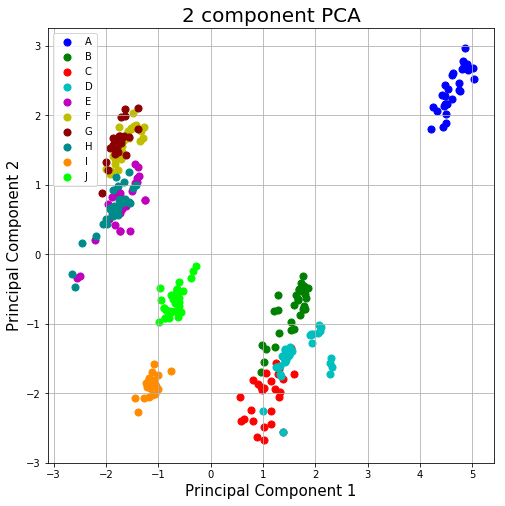

In [15]:
# Visualisation des coordonnées dans le plan cp1/cp2
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(data1.brand.unique())
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'darkred', 'darkcyan','darkorange','lime']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['brand'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

La représentation graphique ci-dessus est la même que celle précédemment effectuée : c'est normal car nous avons résalisé une projection dans le même plan (composante_principle_1, composante_principale_2). On note de plus que les individus on été colorés en fonction du groupe auquel ils appartiennent.
On démontres les mêmes différences comportementales dans l'échantillon étudié, à savoir la création de quatres groupes principaux constitué par les différentes marques : 
Groupe 1 = {G,F,E,H}
Groupe 2 = {J,I}
Groupe 3 = {B,C,D}
Groupe 4 = {A}
Les individus de chaque groupe possèdent donc sensiblement le même comportement vis-à-vis des différentes variables.
Le groupe isolé est ici le groupe 4 : il est entièrement constitué des pizza dont la marque est A. 
Il ne faut donc pas négliger la réalisation d'une nouvelle ACP en excluant ce groupe. Cela nous permettrais de mieux distinguer les différences qu'il existe entre les autres groupes.

#### Étude de la contribution/correlation de chaque variable à chaque axe et aux inerties

In [24]:
#contribution des individus dans l'inertie totale

di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':data1.id,'d_i':di}))

        ID        d_i
0    14069  32.384714
1    14053  31.816500
2    14025  30.259495
3    14016  25.246035
4    14005  24.771480
5    14075  25.077641
6    14082  22.924906
7    14097  28.479278
8    14117  30.796560
9    14133  31.246304
10   14101  30.968357
11   14108  31.465651
12   14164  27.955068
13   14154  24.905632
14   24005  24.543614
15   24026  29.083041
16   24094  23.473236
17   24108  21.307950
18   24102  24.000401
19   24082  26.495317
20   34017  32.460159
21   34020  31.061237
22   24136  25.140775
23   24122  22.742470
24   24115  24.679827
25   34012  26.355603
26   34006  28.353764
27   24146  25.989494
28   24138  28.207181
29   14015   4.866932
..     ...        ...
270  14044   1.858679
271  14045   1.686976
272  14042   1.532336
273  14043   2.193012
274  24065   0.986936
275  24064   1.194202
276  24063   0.978920
277  24062   1.946297
278  24074   0.906055
279  24073   1.712984
280  24072   1.432553
281  24071   1.144675
282  24068   0.981737
283  24078

In [22]:
#Contributions aux axes

ctr = coord**2
for j in range(7):
     ctr[:,j] = ctr[:,j]/(200*eigval[j])

print(pd.DataFrame({'id':data1.id,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

        id     CTR_1     CTR_2
0    14069  0.030087  0.015670
1    14053  0.030249  0.013965
2    14025  0.027677  0.015605
3    14016  0.023943  0.011398
4    14005  0.023968  0.010177
5    14075  0.024322  0.010260
6    14082  0.022319  0.009237
7    14097  0.027131  0.012087
8    14117  0.028246  0.015693
9    14133  0.028970  0.015429
10   14101  0.028088  0.016348
11   14108  0.028675  0.016419
12   14164  0.025480  0.014522
13   14154  0.023431  0.011465
14   24005  0.023913  0.009931
15   24026  0.027081  0.013287
16   24094  0.023682  0.007297
17   24108  0.021162  0.007084
18   24102  0.024236  0.007765
19   24082  0.025444  0.010905
20   34017  0.028277  0.019208
21   34020  0.027875  0.016952
22   24136  0.024468  0.010208
23   24122  0.021689  0.009852
24   24115  0.024160  0.008890
25   34012  0.024721  0.012366
26   34006  0.025738  0.014868
27   24146  0.023935  0.012932
28   24138  0.027046  0.012168
29   14015  0.004152  0.000515
..     ...       ...       ...
270  140

On remarque donc des contribution différentes selon les individus : certains contribuent plus à la construction des axes que d'autres. Par ailleurs pour caractériser un individu de bon participant à la construction des axes, il faut démontrer que sa contribution à l'axe est supérieure aux contributions moyennes.

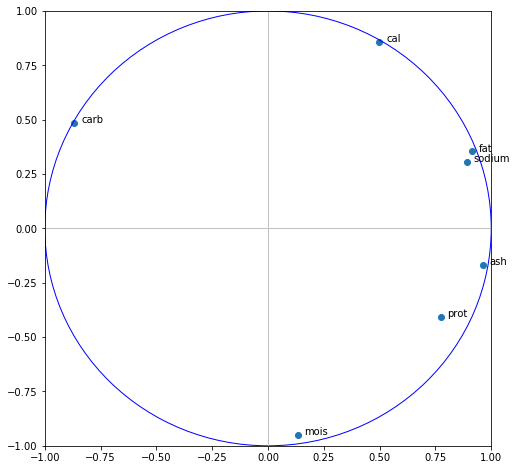

In [26]:
#Analyse de la corrélation des variables dans le plan (cp1,cp2)

#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((7,7))
for k in range(7):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#Afin de récupérer les noms de variables quantitatives (FL,RW,CL,CW et BD)
D=data1[data1.columns[2::]]

#cosinus carré des variables
cos2var = corvar**2

#cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
for j in range(7):
     plt.annotate(D.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

On a affiché le cercle de corrélation ci-dessus. Premièrement, on remarque que les variables sont toutes très bien représentées dans le plan formé par les composantes principales 1 et 2 (à nuancer selon l'axe sur lequel on effectue la projection) 
Les variables fat et sodium sont corrélées positivement par projection sur l'axe principal 1, tout comme ash et prot. D'une manière plus générale ces variables sont corrélées ensemble en projection sur l'axe principal 1 et bien représentées sur ce même axe.
La variable carb est corrélée négativement à ce groupe : ces variables ont des comportements contraires.
Finalement, on remarque que les variables mois et cal (bien représentées en projection sur l'axe 2 mais mal sur l'axe 1) sont corrélées négativement.

__4. Effectuer une CAH pour afficher le dendogramme.__

#### Graphique - croisement deux à deux des variables : ANALYSE DE LA CORRÉLATION DES VARIABLES

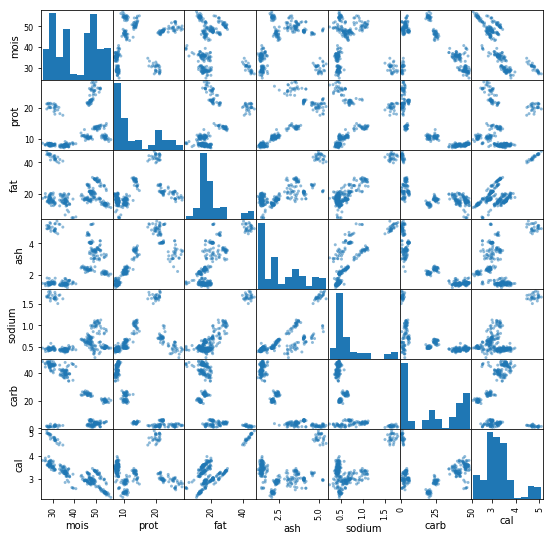

In [28]:
scatt_mat = scatter_matrix(data1.iloc[:,2::],figsize=(9,9))[-1]

On retrouve ici les résultats déduit du cercle de corrélation vis-à-vis des corrélations entre les différentes variables.

#### CAH - Dendogramme

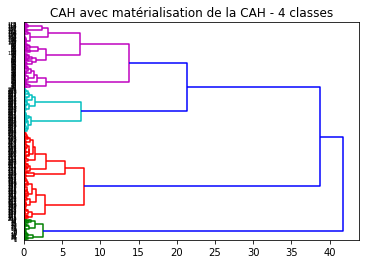

In [30]:
Z = sc.fit_transform(data)

#librairies pour la CAH
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens
link = linkage(Z,method='ward',metric='euclidean')

#affichage du dendrogramme
plt.title('CAH avec matérialisation de la CAH - 4 classes')
dendrogram(link,labels=data1.index,orientation='right',color_threshold=15)
plt.show()

#Récupération des groupes
groupes_cah = fcluster(link,t=20,criterion='distance')

Après une première analyse et compte tenu des résultats obtenus lors de l'ACP, nous démontrons la volonté de créer quatres classes. Cette observation est prise en compte dans le dendogramme ci-dessus par découpage et affichage des quatre classes concernées (cela correspond à une distance de découpe avoisinant 15).
En dernier lieu on remarque que le dendogramme est anti-symétrique : cela confirme bien la présence d'une classe éloignée des autres. On retrouve donc les mêmes interprétations que celles effectuées suite à l'ACP.

__5. Comparer avec une méthode K-means.__

#### Méthode des K-means

In [33]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=4)  # on choisit 4 avec l'étude du dessus
kmeans.fit(Z)

#index triés des groupes

print('Ci-dessous les labels trouvés par la méthode k-means : \n',kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#Affichage des observations et leurs groupes
print("\n Tableau reprenant les groupes auxquels sont associés chaque individu : \n",pd.DataFrame(data1.index[idk],kmeans.labels_[idk]))

Ci-dessous les labels trouvés par la méthode k-means : 
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]

 Tableau reprenant les groupes auxquels sont associés chaque individu : 
       0
0   149
0   143
0   144
0   145
0   146
0   147
0   148
0   210
0   150
0   151
0   152
0   153
0   154
0   155
0   156
0   157
0   158
0   159
0   160
0   161
0   142
0   162
0   141
0   139
0   120
0   121
0   122
0   123
0   124
0   125
..  ...
3 

In [35]:
#Distances aux centres de classes des observations

dist_data = pd.DataFrame(kmeans.transform(Z),index = data1.index)
print('Affichage des distances séparant les observations des différents centres de classes : \n',dist_data)

Affichage des distances séparant les observations des différents centres de classes : 
             0         1         2         3
0    6.942621  5.455676  0.532855  7.119684
1    6.930667  5.364695  0.517307  7.048537
2    6.736191  5.307404  0.432470  6.942152
3    6.331090  4.803225  0.234600  6.444723
4    6.313784  4.712674  0.361064  6.392697
5    6.349777  4.745471  0.256101  6.406929
6    6.139924  4.528424  0.494693  6.205018
7    6.643659  5.068473  0.471161  6.746476
8    6.788319  5.351172  0.395076  6.983860
9    6.836647  5.361300  0.471934  7.035557
10   6.783641  5.374837  0.526396  7.022256
11   6.831760  5.409853  0.521114  7.065013
12   6.525311  5.109609  0.416543  6.738554
13   6.292546  4.791752  0.257869  6.401130
14   6.299976  4.682572  0.312027  6.365650
15   6.682060  5.182126  0.504608  6.763371
16   6.269366  4.496741  0.733311  6.190445
17   6.037235  4.333407  0.867074  5.942950
18   6.310364  4.543523  0.655699  6.271119
19   6.481148  4.892939  0.39238

On a ici créer quatre classes en partant de quatre centre et en utilisant la méthode des K-means

#### Correpondance entre les deux méthodes

In [36]:
pd.crosstab(groupes_cah,kmeans.labels_)

col_0    0   1   2   3
row_0                 
1        0   0  29   0
2      120   0   0   0
3        0   0   0  61
4        0  90   0   0

Par correspondance des individus présents dans chaque groupe obtenu par chaque méthode, on affiche le tableau croisé ci-dessus.
On remarque que les quatres groupes formés par chaque méthode contienent tous les même individus : bien qu'ils possèdent des indices différents, les groupes formés par les deux méthodes sont les mêmes. 

__6. Peut-on dire que la classification est bonne comparée au numéro de marque de pizza donné? (En d'autres termes, vérifier si les pizza appartenant à la même marque sont regroupées dans une même classe).__

Étant donné que les mêmes groupes ont été formés par les deux méthodes, on se concentre sur les groupes formés par la CAH pour traiter cette question. Les résultats seront en effet sensiblement les mêmes si on effectue l'analyse qui va suivre avec les groupes formés par la méthode K-means.

In [37]:
#Découpage à la hauteur t = 15 ==> identifiants de 4 groupes obtenus
groupes_cah = fcluster(link,t=15,criterion='distance')

#Index triés des groupes
idg = np.argsort(groupes_cah)

#Affichage des observations et leurs groupes
df = pd.DataFrame(np.array(data1.brand[idg]), groupes_cah[idg],columns = ["brand"])

grp = [i+1 for i in range(4)]

for groupe in grp:
    a = pd.DataFrame(df.iloc[np.where(df.index == groupe)],columns=['brand'])
    print('Marques présentes dans le groupe ',groupe,' : ',str(a.brand.unique()))

Marques présentes dans le groupe  1  :  ['A']
Marques présentes dans le groupe  2  :  ['F' 'G' 'E' 'H']
Marques présentes dans le groupe  3  :  ['I' 'J']
Marques présentes dans le groupe  4  :  ['B' 'D' 'C']


On retrouve ci-dessus les marques présentes dans chaque groupe. On retrouve bien les groupes effectués lors de l'ACP.
On remarque de plus que nous retrouvons le groupe éloigné 1, dont les éléments sont tous de la marque A.
Par ailleurs, à la vue des résultats ci-dessus, on peut affirmer que les pizzas appartenant à la même marque sont exclusivement regroupés dans une même classe : la classification effectuée (quelque soit la méthode car mêmes résultats) est donc bonne vis-à-vis du numéro de marque de pizza donné.

__7. Est-il judicieux d'exclure un groupe et de refaire une ACP? Justifier et l'effectuer si besoin.__

Comme dit précédemment, nous avons remarqué que le groupe contenant les éléments de la marque A impacte négativement l'analyse de l'ACP de par sa distance aux autres groupes. On a retrouvé ce résultat par analyse de la représentation graphique de l'ACP en projection sur le plan (cp1,cp2) mais également sur le caractère anti-symétrique du dendogramme ou bien lors du détails de chaque marque présente dans chaque groupe.
Il est donc ici judicieux d'exclure un groupe (celui contenant les individus de la marque A) et de refaire une ACP.

#### Exclusion du groupe contenant la marque A

In [38]:
#On enleve le groupe 0 = contient A
subset = data1.iloc[groupes_cah[idg]!=1,:]
x = subset.iloc[:,2:].values
subset.head(2)

brand     id   mois   prot    fat   ash  sodium  carb   cal
29     B  14015  49.57  13.70  29.07  3.62    1.10  4.04  3.33
30     B  14006  52.68  14.38  25.72  3.26    0.93  3.96  3.05

#### Classification CAH

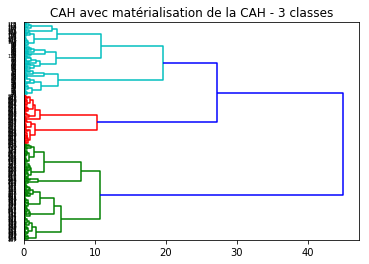

In [39]:
Z = sc.fit_transform(x)

#librairies pour la CAH
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens
link = linkage(Z,method='ward',metric='euclidean')

#affichage du dendrogramme
plt.title('CAH avec matérialisation de la CAH - 3 classes')
dendrogram(link,labels=data1.index,orientation='right',color_threshold=20)
plt.show()

Le dendogramme ici obtenu n'est pas totalement symétrique mais a perdu une importante part de son anti-symétrie par suppression de la classe contenant les pizzas de la marque A.
On remarque cependant qu'il semble que nous retrouvons les mêmes groupes que ceux effectués précédemment : cela est logique car les variables/individus restent les mêmes et qu'il étaient initialement assez distant les uns des autres.

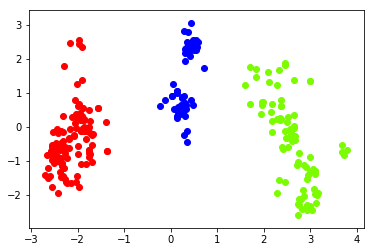

In [40]:
#ACP

from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(Z)

#projeter dans le plan factoriel avec un code couleur différent selon le groupe
groupes_cah = fcluster(link,t=20,criterion='distance')
for couleur,k in zip(['red','blue','lawngreen'],[1,2,3]):
    plt.scatter(acp[groupes_cah==k,0],acp[groupes_cah==k,1],c=couleur)
plt.show()

On remarque ici que le fait d'enlever le groupe contenant les éléments de la marque A nous permet d'obtenir une ACP plus représentative des autres groupes : une meilleur interprétation de ces individus peut dorénavant être faite.
On remarque de plus qu'on retrouve les mêmes groupes que précédemment effectués.
Pour s'en convaincre et pour mener une analyse plus précise, un graphique plus détaillé devrait être construit (avec ajout des marques...). Je ne peux en revanche pas l'afficher par manque de temps.

# Partie 2

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from pandas.plotting import scatter_matrix
import tensorflow as tf
import sys
from sklearn.model_selection import train_test_split

#La fonction pour récupérer l'indice du maximum d'une liste
def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

In [45]:
data2 = pd.read_excel('dataset.xlsx')
data2.head(2)

NBG   GC  TD  EPC  IS   IMC     DG  AGE  RESULTAT
0    6  148  72   35   0  33.6  0.627   50         1
1    1   85  66   29   0  26.6  0.351   31         0

__1. Créer un réseau de neurones permettant de prédire si une patiente est prédisposée au diabète ou non. En premier lieu suggérer le votre, puis utiliser le modèle proposé et comparer.__

#### Récupération et mise en forme des données

In [48]:
datas = data2.iloc[:,0:8]
labels = data2.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(datas, labels, test_size=0.2)
x_train,y_train = np.array(x_train),np.array(y_train)
x_test,y_test = np.array(x_test),np.array(y_test)

c = ['Pas diabète','Diabète']
colors_train = [c[i] for i in y_train.astype(int)] #On convertit le label en int car array donne chaine de caractère
colors_test = [c[i] for i in y_test.astype(int)]

datas_df_train = np.array([list(data)+[color] for (data,color) in zip(x_train, colors_train)]) #Crée une matrice de ligne abscisse et ordonee et de 2*nb colonnes
datas_df_test = np.array([list(data)+[color] for (data,color) in zip(x_test, colors_test)]) #Crée une matrice de ligne abscisse et ordonee et de 2*nb colonnes

df_train = pd.DataFrame(datas_df_train, columns=['NBG','GC','TD','EPC','IS','IMC','DG','AGE','RESULTAT'])
df_test = pd.DataFrame(datas_df_test, columns=['NBG','GC','TD','EPC','IS','IMC','DG','AGE','RESULTAT'])
df_train.head(2)

NBG     GC     TD   EPC     IS   IMC     DG   AGE RESULTAT
0   4.0  173.0   70.0  14.0  168.0  29.7  0.361  33.0  Diabète
1  13.0  158.0  114.0   0.0    0.0  42.3  0.257  44.0  Diabète

#### Création du modèle

In [49]:
# model creation
model = tf.keras.models.Sequential()

# Add the layers

## NB_VAR * NB_VAR
model.add(tf.keras.layers.Dense(64, activation="relu"))

## NB_VAR * NB_VAR * 1 / 2  
model.add(tf.keras.layers.Dense(32, activation="relu"))
## Ancien nombre * 1/2
model.add(tf.keras.layers.Dense(16, activation="relu"))
## Ancien nombre * 1/2
model.add(tf.keras.layers.Dense(8, activation="relu"))
## Ancien nombre * 1/2
model.add(tf.keras.layers.Dense(4, activation="relu"))
## Ancien nombre * 1/2

## Dernière couche : transorme résultats en probabilités
## 2 neuronnes car choix final binaire 
model.add(tf.keras.layers.Dense(2, activation="softmax"))

#### Exemple de prédiction sans entraînement (nécessaire pour le résumé du modèle)

In [51]:
model_output = model.predict(x_train[0:1])
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

Instructions for updating:
Colocations handled automatically by placer.
[[1.00000000e+00 1.12475464e-23]]
Found :  0
Should be :  1


#### Résumé du modèle

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  576       
_________________________________________________________________
dense_1 (Dense)              multiple                  2080      
_________________________________________________________________
dense_2 (Dense)              multiple                  528       
_________________________________________________________________
dense_3 (Dense)              multiple                  136       
_________________________________________________________________
dense_4 (Dense)              multiple                  36        
_________________________________________________________________
dense_5 (Dense)              multiple                  10        
Total params: 3,366
Trainable params: 3,366
Non-trainable params: 0
_________________________________________________________________


#### Compilation du modèle

In [53]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

#### Entraînement du modèle

In [57]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Train on 491 samples, validate on 123 samples
Epoch 1/10
491/491 [==============================] - 0s 95us/sample - loss: 0.5739 - acc: 0.6721 - val_loss: 0.6679 - val_acc: 0.6098
Epoch 2/10
491/491 [==============================] - 0s 105us/sample - loss: 0.5728 - acc: 0.6721 - val_loss: 0.7042 - val_acc: 0.6098
Epoch 3/10
491/491 [==============================] - 0s 117us/sample - loss: 0.5719 - acc: 0.6721 - val_loss: 0.7735 - val_acc: 0.6098
Epoch 4/10
491/491 [==============================] - 0s 96us/sample - loss: 0.5765 - acc: 0.6721 - val_loss: 0.6566 - val_acc: 0.6098
Epoch 5/10
491/491 [==============================] - 0s 137us/sample - loss: 0.5760 - acc: 0.6721 - val_loss: 0.6753 - val_acc: 0.6098
Epoch 6/10
491/491 [==============================] - 0s 128us/sample - loss: 0.5722 - acc: 0.6721 - val_loss: 0.7574 - val_acc: 0.6098
Epoch 7/10
491/491 [==============================] - 0s 99us/sample - loss: 0.5753 - acc: 0.6721 - val_loss: 0.6887 - val_acc: 0.6098
Epoch

#### Résumé de l'entraînement

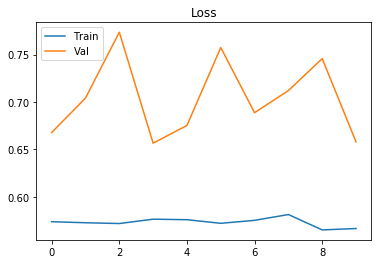

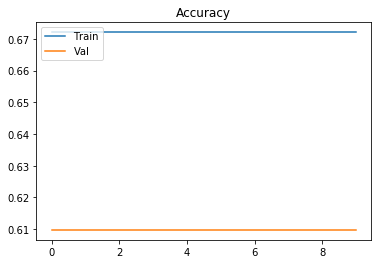

In [58]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

On remarque ici une valeur de perte plus basse que celle offerte par les données et une meilleure précision. On remarque cependant que la précision obtenue est constante et non-évolutive : le choix d'un autre modèle peut s'avérer utile dans le but de remédier à ce problème. Ici un nombre plus importants d'epoch, normalement censé améliorer la précision et l'efficacité de l'entraînement, ne serait ici utile que pour améliorer les résultats de la fonction de perte. Je ne le fais pas par manque de temps.

#### Test du modèle

In [59]:
loss, acc = model.evaluate(x_test, y_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

154/154 [==============================] - 0s 42us/sample - loss: 0.6467 - acc: 0.6169
Test Loss 0.6466528053407545
Test Accuracy 0.6168831


Le modèle ici présenté n'est pas réellement bon car faible précision et perte élevée. Je n'ai pas le temps de l'améliorer, mais ces chgangements seraient à faire sur la structure du réseau(nombre de couches et de neurones)

### Utiliser ce modèle et comparer

In [61]:
# model creation
model = tf.keras.models.Sequential()
# Add the layers
model.add(tf.keras.layers.Dense(12, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(
    loss="binary_crossentropy",      
    optimizer="adam",                            
    metrics=["accuracy"]                           
)

#### Entraînement

In [63]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Train on 491 samples, validate on 123 samples
Epoch 1/10
491/491 [==============================] - 0s 130us/sample - loss: 0.5707 - acc: 0.6904 - val_loss: 0.7449 - val_acc: 0.6260
Epoch 2/10
491/491 [==============================] - 0s 193us/sample - loss: 0.5597 - acc: 0.7251 - val_loss: 0.7432 - val_acc: 0.6016
Epoch 3/10
491/491 [==============================] - 0s 189us/sample - loss: 0.5575 - acc: 0.7271 - val_loss: 0.7126 - val_acc: 0.6016
Epoch 4/10
491/491 [==============================] - 0s 167us/sample - loss: 0.5548 - acc: 0.7332 - val_loss: 0.7220 - val_acc: 0.6098
Epoch 5/10
491/491 [==============================] - 0s 187us/sample - loss: 0.5497 - acc: 0.7352 - val_loss: 0.7147 - val_acc: 0.6016
Epoch 6/10
491/491 [==============================] - 0s 110us/sample - loss: 0.5467 - acc: 0.7291 - val_loss: 0.7392 - val_acc: 0.6341
Epoch 7/10
491/491 [==============================] - 0s 159us/sample - loss: 0.5472 - acc: 0.7291 - val_loss: 0.7313 - val_acc: 0.6260
Ep

#### Résumé de l'entraînement

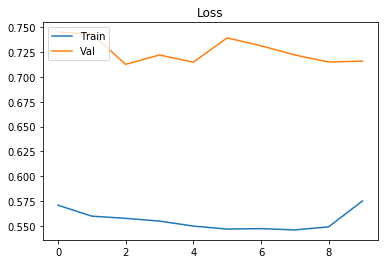

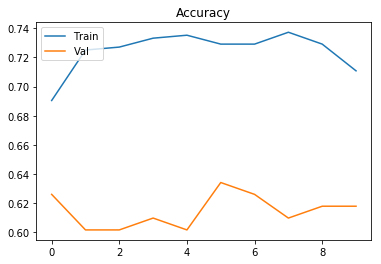

In [64]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

Ici un bon entraînement pour une valeur de la précision plus importante que le modèle présenté par mes soins.

#### Test du modèle

In [65]:
loss, acc = model.evaluate(x_test, y_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

154/154 [==============================] - 0s 43us/sample - loss: 0.5908 - acc: 0.6753
Test Loss 0.5907726682625808
Test Accuracy 0.6753247


On retrouve ici donc une meilleure précision que celle du modèle que j'ai présenté et une fonction de perte plus faible. Le modèle est donc meilleur que celui que j'ai fait mais peut-être amélioré.